<a href="https://colab.research.google.com/github/ssvadla/MachineLearning/blob/main/Assignment3_SaiSupriyaVadla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
train_dataset = pd.read_csv('/content/drive/My Drive/5505_MachineLearning/ALS_TrainingData_2223.csv')
test_dataset = pd.read_csv('/content/drive/My Drive/5505_MachineLearning/ALS_TestingData_78.csv')

In [4]:
train_dataset.head(10)

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,...,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,24.0,22.0,18.0,0.020906,31,27.5,23.0,0.027875,30.0,28.0,25.0,0.017422,8.0322,7.11945,6.5718,0.005089,90,83.0,69,0.055556,160,139.0,129,0.082011,2.49500,2.220550,2.22055,0.000956,109.0,...,146.0,143.0,0.045296,8,6.5,4,0.010582,5,3.5,0,0.013228,-1023,1,172,169.0,152.0,4.5,4.25,4.0,0.001742,79,68.0,61,0.047619,4,3.0,3,0.002646,148.0,145.5,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,25.0,13.0,8.0,0.029617,31,17.0,14.0,0.029617,32.0,28.0,25.0,0.012195,8.3973,4.74630,4.0161,0.007633,80,78.0,64,0.028725,140,132.5,104,0.064632,2.32035,2.170650,2.02095,0.000522,108.0,...,132.0,128.0,0.017422,8,7.5,3,0.008977,9,8.0,4,0.008977,-341,1,286,264.0,230.0,5.0,4.30,3.9,0.001916,90,76.0,64,0.046679,4,4.0,3,0.001795,142.0,138.0,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,25.0,20.0,14.0,0.019643,24,19.0,18.0,0.010714,35.0,29.0,24.0,0.019643,5.4765,4.38120,3.6510,0.003260,86,76.0,58,0.050000,120,110.0,90,0.053571,2.47005,2.295400,2.19560,0.000490,108.0,...,154.0,151.0,0.017857,4,3.0,2,0.003571,10,7.0,4,0.010714,-1181,1,233,213.0,167.0,4.1,4.00,3.9,0.000357,82,73.0,60,0.039286,4,4.0,4,0.000000,145.0,143.0,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,62.0,60.0,41.0,0.052369,46,40.0,33.0,0.032419,23.0,20.0,20.0,0.007481,8.0322,8.03220,6.5718,0.003642,90,80.0,70,0.049875,150,130.0,120,0.074813,2.47005,2.345300,2.23000,0.000474,109.0,...,145.0,144.0,0.024938,4,3.5,2,0.004988,12,12.0,12,0.000000,-365,2,275,233.0,204.0,4.3,4.20,4.0,0.000748,84,72.0,68,0.039900,3,3.0,3,0.000000,143.0,139.0,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,38.0,26.5,22.0,0.026534,35,26.5,20.0,0.024876,32.0,28.0,23.0,0.014925,5.1114,4.19865,3.6510,0.002422,100,80.0,68,0.053068,160,130.0,104,0.092869,2.42015,2.257975,2.17065,0.000414,107.0,...,146.5,138.0,0.023217,2,2.0,0,0.003396,12,12.0,12,0.000000,-1768,2,313,283.5,268.0,4.6,3.75,3.5,0.001824,101,96.0,74,0.044776,4,4.0,3,0.001698,143.0,140.0,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0
5,6,36,51.0,47.0,46.0,0.009058,-0.118353,37,34.5,27,0.018116,34.0,23.0,18.0,0.028986,31,26.0,21.0,0.018116,29.0,26.0,22.0,0.012681,6.5718,5.11140,4.0161,0.004630,84,80.0,60,0.043478,140,115.0,100,0.072464,2.39520,2.270450,2.17065,0.000407,110.0,...,146.0,142.0,0.027174,8,8.0,4,0.007246,9,8.0,7,0.003623,-334,1,220,194.0,178.0,4.5,4.30,4.2,0.000543,88,66.0,60,0.050725,4,4.0,3,0.001812,145.0,141.0,137.0,0.014493,3085,8,8.0,7,0.001812,8.0,6.0,5.0
6,7,55,46.0,44.0,40.0,0.010850,-1.225580,34,24.0,10,0.043400,80.0,46.0,19.0,0.110307,57,37.0,22.0,0

In [5]:
train_dataset.describe()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,...,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
count,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,...,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000
mean,1214.874944,54.550157,47.011134,43.952542,40.766347,0.013779,-0.728274,31.692308,27.104926,19.877193,0.026035,54.436257,32.993252,23.014800,0.071137,43.127755,29.076923,21.542465,0.049191,30.897301,26.963765,23.164327,0.016868,7.353054,5.558011,4.160875,0.007133,92.030589,81.113360,69.890688,0.047658,147.135403,129.579172,113.429600,0.071178,2.474835,2.345584,2.222855,0.000541,107.152182,...,144.289024,135.461130,0.038242,5.309942,4.049708,2.493477,0.006163,10.743140,9.703329,7.778228,0.006595,-682.995502,1.800720,285.301844,238.781601,208.382005,4.628367,4.189269,3.857323,0.001744,90.642375,76.973234,65.373819,0.053587,3.910031,3.592668,2.791273,0.002513,143.428880,140.145254,136.755061,0.015000,498880.290148,6.203779,4.893387,2.955915,0.007136,6.820450,5.710639,5.183221
std,696.678300,11.396546,3.233980,2.654804,3.193087,0.009567,0.622329,5.314228,6.633643,8.583509,0.016156,44.829577,15.601925,11.231221,0.110889,35.288701,9.593911,7.395303,0.084100,3.164472,2.198824,2.408519,0.011280,2.319538,1.335236,1.354256,0.005070,8.758227,7.245578,8.443662,0.027282,15.754048,12.160938,11.195037,0.033110,0.180246,0.088418,0.172787,0.000481,2.616967,...,11.602846,14.890612,0.035134,2.244651,2.280781,2.124570,0.004372,1.897501,2.771850,3.740073,0.006128,411.800405,0.419334,70.175312,52.626504,49.321238,1.325412,0.243075,0.263050,0.002898,11.104866,8.437749,7.763446,0.027403,0.298516,0.612385,1.055428,0.002477,2.333157,1.789886,2.715247,0.009283,289923.528450,1.747660,2.146076,2.358095,0.004503,0.932141,0.625039,0.437222
min,1.000000,18.000000,37.000000,34.500000,24.000000,0.000000,-4.345238,11.000000,2.500000,0.000000,0.000000,10.000000,8.000000,1.600000,0.002747,11.000000,9.000000,1.000000,0.000000,20.000000,19.500000,2.500000,0.000000,2.920800,2.190600,0.584160,0.000000,70.000000,56.000000,20.

In [6]:
print(train_dataset.columns[0:25])

Index(['ID', 'Age_mean', 'Albumin_max', 'Albumin_median', 'Albumin_min',
       'Albumin_range', 'ALSFRS_slope', 'ALSFRS_Total_max',
       'ALSFRS_Total_median', 'ALSFRS_Total_min', 'ALSFRS_Total_range',
       'ALT.SGPT._max', 'ALT.SGPT._median', 'ALT.SGPT._min', 'ALT.SGPT._range',
       'AST.SGOT._max', 'AST.SGOT._median', 'AST.SGOT._min', 'AST.SGOT._range',
       'Bicarbonate_max', 'Bicarbonate_median', 'Bicarbonate_min',
       'Bicarbonate_range', 'Blood.Urea.Nitrogen..BUN._max',
       'Blood.Urea.Nitrogen..BUN._median'],
      dtype='object')


In [7]:
attributes = ['Age_mean','Sodium_range','Albumin_median','Urine.Ph_max','ALSFRS_Total_median','ALSFRS_slope','Bicarbonate_range','AST.SGOT._median']



In [8]:
train_dataset[attributes].describe()

,Age_mean,Sodium_range,Albumin_median,Urine.Ph_max,ALSFRS_Total_median,ALSFRS_slope,Bicarbonate_range,AST.SGOT._median
count,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000
mean,54.550157,0.015000,43.952542,6.820450,27.104926,-0.728274,0.016868,29.076923
std,11.396546,0.009283,2.654804,0.932141,6.633643,0.622329,0.011280,9.593911
min,18.000000,0.000000,34.500000,5.000000,2.500000,-4.345238,0.000000,9.000000
25%,47.000000,0.010582,42.000000,6.000000,23.000000,-1.086310,0.012658,22.000000
50%,55.000000,0.013123,44.000000,7.000000,28.000000,-0.620748,0.014925,27.000000
75%,63.000000,0.017278,46.000000,7.000000,32.000000,-0.283832,0.018149,34.000000
max,81.000000,0.142857,51.100000,9.000000,40.000000,1.207011,0.214286,100.000000


In [9]:
X = train_dataset[attributes]

X_test = test_dataset[attributes]


In [10]:
X.columns

Index(['Age_mean', 'Sodium_range', 'Albumin_median', 'Urine.Ph_max',
       'ALSFRS_Total_median', 'ALSFRS_slope', 'Bicarbonate_range',
       'AST.SGOT._median'],
      dtype='object')

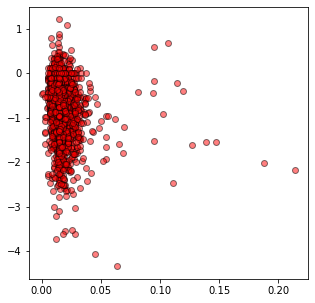

In [11]:
plt.figure(figsize=(5,5))
plt.scatter(train_dataset['Bicarbonate_range'], train_dataset['ALSFRS_slope'], color='Red', alpha=0.5, edgecolor='k')


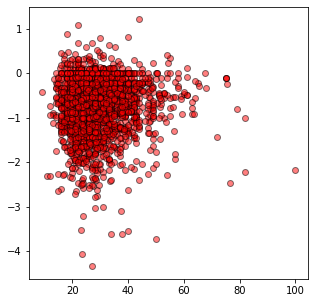

In [12]:
plt.figure(figsize=(5,5))
plt.scatter(train_dataset['AST.SGOT._median'], train_dataset['ALSFRS_slope'], color='Red', alpha=0.5, edgecolor='k')


In [13]:
from sklearn.cluster import KMeans

In [14]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))

Text(0, 0.5, 'Sum of squared distance')

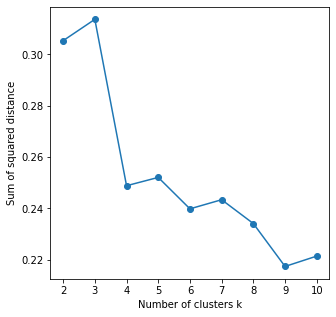

In [15]:
plt.figure(figsize=(5, 5))
plt.plot(range(2, kmax+1), sil, '-o')
plt.xlabel(r'Number of clusters k')
plt.ylabel('Sum of squared distance')

In [16]:
from sklearn.cluster import KMeans
cluster_kMeans = KMeans(n_clusters=3)
cluster_kMeans.fit(X)
pred_test = cluster_kMeans.predict(X_test)

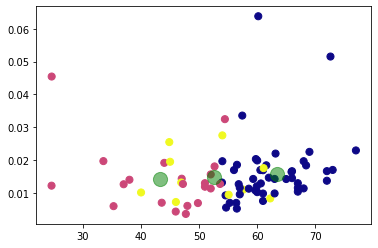

In [17]:
plt.scatter(X_test[attributes[0]],X_test[attributes[1]], c=pred_test, s=50, cmap='plasma')
cluster_centers = cluster_kMeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='green', s=200, alpha=0.5)

In [18]:
cluster_centers

array([[ 6.34245810e+01,  1.56447725e-02,  4.31668063e+01,
         6.81661080e+00,  2.72667598e+01, -7.39406908e-01,
         1.73788337e-02,  2.62863128e+01],
       [ 4.32461538e+01,  1.42183967e-02,  4.47425641e+01,
         6.85307692e+00,  2.57766026e+01, -7.34401518e-01,
         1.59462867e-02,  2.54557692e+01],
       [ 5.26151762e+01,  1.47734479e-02,  4.45695122e+01,
         6.76265583e+00,  2.94417344e+01, -6.82919153e-01,
         1.73304065e-02,  4.48536585e+01]])

In [19]:

cluster_kMeans = KMeans(n_clusters=4)
cluster_kMeans.fit(X)
pred_test = cluster_kMeans.predict(X_test)

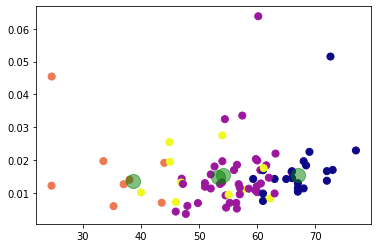

In [20]:
plt.scatter(X_test[attributes[0]],X_test[attributes[1]], c=pred_test, s=50, cmap='plasma')
cluster_centers = cluster_kMeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='green', s=200, alpha=0.5)

In [21]:
cluster_centers

array([[ 6.69940916e+01,  1.55963453e-02,  4.29517725e+01,
         6.78858198e+00,  2.82658789e+01, -6.96189099e-01,
         1.68950208e-02,  2.75480059e+01],
       [ 5.41293952e+01,  1.55726552e-02,  4.37630098e+01,
         6.88772152e+00,  2.53582982e+01, -8.21781794e-01,
         1.80008569e-02,  2.41526020e+01],
       [ 3.86969072e+01,  1.34693703e-02,  4.52449485e+01,
         6.80907216e+00,  2.63639175e+01, -6.82222624e-01,
         1.50766680e-02,  2.68556701e+01],
       [ 5.33028571e+01,  1.48020263e-02,  4.44824286e+01,
         6.76120000e+00,  2.94342857e+01, -6.64195782e-01,
         1.69976249e-02,  4.51157143e+01]])